In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Kde: Kernel density estimation.
#### 1.1. Define a class & some relative_kernel

In [2]:
pi = np.pi

## Rectangle kernel
def rect_kernel(t):
    return 0.5 * (abs(t) <= 1)

## Bi-weight kernel
def biw_kernel(t):
    return (15/16)*(1-t**2)**2*(abs(t) <= 1)

## Triangular kernel
def trig_kernel(t):
    return (1 - abs(t))*(abs(t) <= 1)

## Epanechnikov kernel
def epa_kernel(t):
    return 0.75*(1 - t**2)*(abs(t) <= 1)

## Gaussian kernel
def gau_kernel(t):
    return (1/np.sqrt(2*np.pi))*np.exp(-t**2/2)

## Silverman kernel    
def silv_kernel(t):
    return 0.5*np.exp(-abs(t / np.sqrt(2)))*np.sin(abs(t / np.sqrt(2)) + np.pi/4)

## Sigmoid kernel
def sigm_kernel(t):
    return 2/(pi*(np.exp(t) + np.exp(-t)))

## Logistic kernel
def logis_kernel(t):
    return 1/(2 + np.exp(t) + np.exp(-t))

## Tricube kernel
def tricube_kernel(t):
    return (70/81)*((1 - abs(t**3))**3)*(abs(t) <= 1)

## Define the class
class kernel_density_est:
    """ 
        ***********************************************************************
        *    This class used for:
        *        - 1) Find the optimal_bins
        *        - 2) Display many k.d.e with different type of kernel_function
        *        - 3) Given the ecdf of the data.
        *    
        *     of the 1-D data input.
        ************************************************************************
        * Parameters :
        *-------------------------------------------------------------------------
        *     data : must be 1-D dataset
        *     kernel_type (str): type of kernel, can be {"gauss", "bi-weight", "rectangle".
        *                                               "triangle", "Epanechnikov", "silverman",
        *                                               "sigmoid", "logistic", "tri-cube"}
        *     normed : normed your kde and histogram or not?
        *------------------------------------------------------------------------------------------------
        * Attributes:
        * -----------------
        *    get_params: returns the parameters in this class
        *    get_bins: returns the bins-width of histogram_kde
        *    display : show the kde
        *    show_ecdf: display the empirical cummulative distribution function
        *************************************************************************
    """
    def __init__(self, data, kernel_type = "gauss", normed = True):
        
        self.data = data
        self.kernel_type = kernel_type
        self.normed = normed
        
    def get_params(self):
        """ Returns the initial parameters """
        return {'kernel': self.kernel_type, 'normed': self.normed}
    
    def get_bins(self):
        return 1 / np.sqrt(len(self.data))
    
    def display(self):
        n = len(self.data)
        h = self.get_bins()
        is_normed = self.normed
        
        kde_constant = (1 / (2*n*h))**(is_normed)
        kernel_type = self.kernel_type
        
        u = np.linspace(min(self.data), max(self.data), 1000)
        kde = np.zeros(len(u))
        
        for x_k in self.data:
            if kernel_type == "gauss":
                kde = kde + gau_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "bi-weight":
                kde = kde + biw_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "rectangle":
                kde = kde + rect_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "triangle":
                kde = kde + trig_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "Epanechnikov":
                kde = kde + epa_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "silverman":
                kde = kde + silv_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "tricube":
                kde = kde + tricube_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "sigmoid":
                kde = kde + sigm_kernel((x_k -  u)/h) * kde_constant
            elif kernel_type == "logistic":
                kde = kde + logis_kernel((x_k -  u)/h) * kde_constant
            else:
                raise TypeError("No kernel named: "+str(kernel_type))
        
        
        plt.plot(u, kde, '-', label = 'kde')
        plt.title('kernel = '+str(kernel_type))
        plt.xlabel("normed = "+str(is_normed))
                
    def show_ecdf(self):
        x = self.data
        x = np.sort(x)
        n = len(x)
        y = np.arange(1, n + 1, 1) / n
        plt.plot(x, y, label = 'ecdf')
        plt.legend()
    plt.show()

#### 1.2. Implementation

{'kernel': 'gauss', 'normed': True}
0.08164965809277261


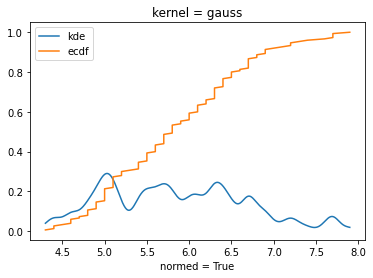

In [3]:
iris = sns.load_dataset("iris")
x = iris.sepal_length

kde = kernel_density_est(x, normed = True, kernel_type = "gauss")
print(kde.get_params())
print(kde.get_bins())
kde.display()
kde.show_ecdf()

#### Wraping-up

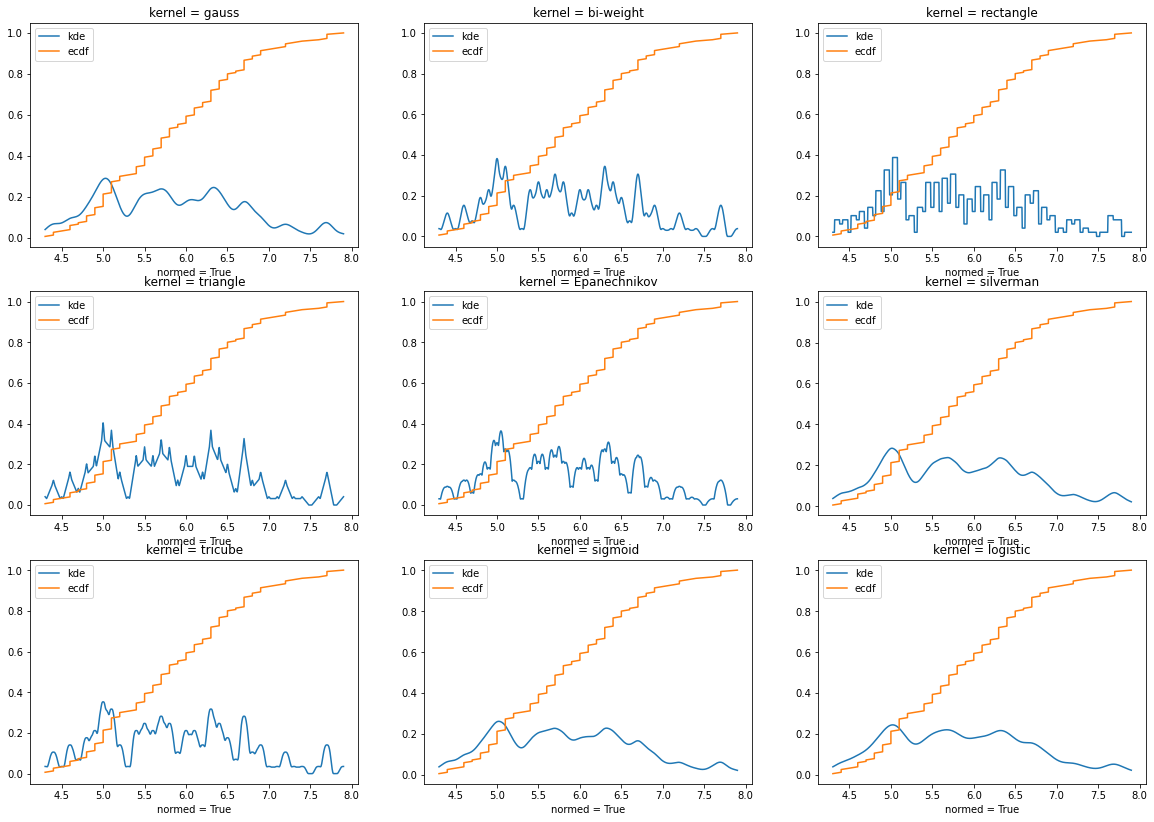

In [4]:
plt.figure(figsize = (20, 14))
for idx, kernel_name in enumerate(["gauss", "bi-weight", "rectangle", 
                                   "triangle", "Epanechnikov", "silverman",
                                   "tricube", "sigmoid", "logistic"]):
    kde = kernel_density_est(x, normed = True, kernel_type = kernel_name)
    plt.subplot(3, 3, idx +1)
    kde.display()
    kde.show_ecdf()
plt.show()

#### Checking help-function

In [5]:
help(kde)

Help on kernel_density_est in module __main__ object:

class kernel_density_est(builtins.object)
 |  kernel_density_est(data, kernel_type='gauss', normed=True)
 |  
 |  ***********************************************************************
 |  *    This class used for:
 |  *        - 1) Find the optimal_bins
 |  *        - 2) Display many k.d.e with different type of kernel_function
 |  *        - 3) Given the ecdf of the data.
 |  *    
 |  *     of the 1-D data input.
 |  ************************************************************************
 |  * Parameters :
 |  *-------------------------------------------------------------------------
 |  *     data : must be 1-D dataset
 |  *     kernel_type (str): type of kernel, can be {"gauss", "bi-weight", "rectangle".
 |  *                                               "triangle", "Epanechnikov", "silverman",
 |  *                                               "sigmoid", "logistic", "tri-cube"}
 |  *     normed : normed your kde and histo

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.08164965809277261 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

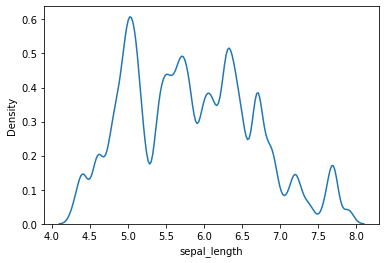

In [6]:
band_width = 1 / np.sqrt(len(x))
sns.kdeplot(x, bw = band_width)

## 2. Polynomial_Univariate_Regression
### 2.1. Define a class

In [7]:
class Polynomial_Univariate_Regression:
    """
    
    """
    def __init__(self):
        pass
    

## 3. Many testing_type.
### 3.1. Define some classes

In [8]:
from scipy.stats import norm, t, chisquare

# Hypothesis class 
class prop_testing:
    """
        Importance parameters:
            alternative = {"equal (two_side)", "lower_tail (less)", "upper_tail (greater)"}
            alpha (float in [0, 1]) = significance level / then (1 - alpha) be the confidence_level
    """
    def __init__(self, alpha, alter = "equal"):
        self.alpha = alpha
        self.alter = alter
    
    def prop_1_test(self, n, y, p0):
        """
            p0: theorictic_proportion
            n: sample size
            y: total the elements in population that satisfies a property
        """
        p_hat = y / n # proportion in empirical sample
        Z0 = (p_hat - p0)/np.sqrt(( p0 * (1 - p0))/n) # statistical testing'
        
        # for two_sided alternative
        if self.alter == "equal":
            p_value = 1 - norm.cdf(Z0)
            dung_sai = abs(norm.ppf(self.alpha / 2))*np.sqrt(( p_hat * (1 - p_hat))/n)
            conf_int = [p_hat - dung_sai, p_hat + dung_sai]
            alter = "p = p0 (equal)"
            
        # if alternative = "p < p0"
        elif self.alter == "less":
            p_value = norm.cdf(Z0)
            dung_sai = abs(norm.ppf(self.alpha))*np.sqrt(( p_hat * (1 - p_hat))/n)
            conf_int = [0, p_hat + dung_sai]
            alter = "p < p0 (less)"
            
        elif self.alter == "greater":
            p_value = 2*min(1 - norm.cdf(Z0), norm.cdf(Z0))
            dung_sai = abs(norm.ppf(self.alpha))*np.sqrt(( p_hat * (1 - p_hat))/n)
            conf_int = [p_hat - dung_sai, 1]
            alter = "p > p0 (greater)"
        else:
            raise ValueError("no alternative like %s, please type help to get more details"%format(alter))
        
        if p_value < self.alpha:
            claim = "Reject H0"
        else:
            claim = "Not engough evidence to reject H0"
            
        return {'p_value': p_value, 
                "statistical_testing": Z0,
                'sample_estimates': p_hat, 
                "conf_interval": conf_int,
                "final_claim": claim,
                "alternative": alter
               }
    
    def prop_2_test(self, n1, n2, y1, y2):
        """
            n1, n2: sample_size of 2 samples
            y1, y2: total the elements in population that satisfies a property
        """
        p1_hat = y1 / n1
        p2_hat = y2 / n2
        p_hat = (y1 + y2) / (n1 + n2)
        Z0 = (p1_hat - p2_hat) / np.sqrt(p_hat*(1 - p_hat)*( 1/n1 + 1/n2))
        diff_prop = p1_hat - p2_hat
        
        # for two_sided alternative
        if self.alter == "equal":
            p_value = 1 - norm.cdf(Z0)
            dung_sai = abs(norm.ppf(self.alpha / 2))*np.sqrt((p1_hat*(1-p1_hat)/ n1) + (p2_hat*(1-p2_hat)/ n2) )
            conf_int = [diff_prop - dung_sai, diff_prop + dung_sai]
            alter = "p = p0 (equal)"
            
        # if alternative = "p < p0"
        elif self.alter == "less":
            p_value = norm.cdf(Z0)
            dung_sai = abs(norm.ppf(self.alpha))*np.sqrt((p1_hat*(1-p1_hat)/ n1) + (p2_hat*(1-p2_hat)/ n2) )
            conf_int = [0, diff_prop + dung_sai]
            alter = "p < p0 (less)"
            
        elif self.alter == "greater":
            p_value = 2*min(1 - norm.cdf(Z0), norm.cdf(Z0))
            dung_sai = abs(norm.ppf(self.alpha))*np.sqrt((p1_hat*(1-p1_hat)/ n1) + (p2_hat*(1-p2_hat)/ n2) )
            conf_int = [diff_prop - dung_sai, 1]
            alter = "p > p0 (greater)"
        else:
            raise ValueError("no alternative like %s, please type help to get more details"%format(alter))
        
        if p_value < self.alpha:
            claim = "Reject H0"
        else:
            claim = "Not engough evidence to reject H0"
            
        return {'p_value': p_value, 
                "statistical_testing": Z0,
                'sample_estimates (prop_samp1, prop_samp2)': (p1_hat, p2_hat), 
                "conf_interval": conf_int,
                "final_claim": claim,
                "alternative": alter
               }
    
## independent test

In [9]:
n = len(x)
y = len(x[x <= 5.5])
test = prop_testing(alpha = 0.05)
test.prop_1_test(n, y, 0.5)

{'p_value': 0.9955096643790506,
 'statistical_testing': -2.6127890589687235,
 'sample_estimates': 0.3933333333333333,
 'conf_interval': [0.3151601307479124, 0.47150653591875424],
 'final_claim': 'Not engough evidence to reject H0',
 'alternative': 'p = p0 (equal)'}

In [10]:
test = prop_testing(alpha = 0.01, alter = "greater")
test.prop_1_test(800, 448, 0.5)

{'p_value': 0.0006885138966450377,
 'statistical_testing': 3.394112549695431,
 'sample_estimates': 0.56,
 'conf_interval': [0.5191727605052125, 1],
 'final_claim': 'Reject H0',
 'alternative': 'p > p0 (greater)'}

In [11]:
test = prop_testing(alpha = 0.01)
test.prop_2_test(500, 600, 400, 300)

{'p_value': 0.0,
 'statistical_testing': 10.299098434883929,
 'sample_estimates (prop_samp1, prop_samp2)': (0.8, 0.5),
 'conf_interval': [0.2300878611201725, 0.3699121388798276],
 'final_claim': 'Reject H0',
 'alternative': 'p = p0 (equal)'}